In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# Load IRIS Data into a dataframe
from sklearn import datasets
iris = datasets.load_iris()    
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

# Target and Data
y = df['target']
X = df[[col for col in df.columns if col not in ['target']]]

In [8]:
# Settings
n_components = None
data = X.copy()

In [9]:
# Conduct PCS
pca = PCA()
p_components = pca.fit_transform(data)
p_components = pd.DataFrame(p_components)

# Add the principal component columns
p_components.columns = p_components.columns+1
p_components = p_components.add_prefix('Principal Component ')
output_data = pd.concat([data,p_components], axis = 1)
print("Original Data")
display(output_data)

# Explained Variance (Eigenvalues)
eigenvalues = pca.explained_variance_

# Explained Variance Ratios
ev_ratios = pca.explained_variance_ratio_

# Eigenvalues Matrix
ev_matrix = pd.DataFrame({'eigenvalues':eigenvalues, 'ev_ratios':ev_ratios, 'cum_percent':ev_ratios.cumsum()*100})
print("Matrix of Eigenvalues for a Pareto Diagram")
display(ev_matrix)

# Covariance Matrix
covariance_matrix = pd.DataFrame(pca.get_covariance())
covariance_matrix.columns = data.columns
covariance_matrix.index = data.columns
print("Covariance Matrix")
display(covariance_matrix)

# Egenvectors
eigenvectors = pd.DataFrame(pca.components_)
eigenvectors.columns = p_components.columns
eigenvectors.index = data.columns
print("Eigenvectors")
display(eigenvectors) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944110,0.187532,0.177825,-0.426196
146,6.3,2.5,5.0,1.9,1.527167,-0.375317,-0.121898,-0.254367
147,6.5,3.0,5.2,2.0,1.764346,0.078859,0.130482,-0.137001
148,6.2,3.4,5.4,2.3,1.900942,0.116628,0.723252,-0.044595


,eigenvalues,ev_ratios,cum_percent
0,4.228242,0.924619,92.461872
1,0.242671,0.053066,97.768521
2,0.078210,0.017103,99.478782
3,0.023835,0.005212,100.000000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
sepal length (cm),0.361387,-0.084523,0.856671,0.358289
sepal width (cm),0.656589,0.730161,-0.173373,-0.075481
petal length (cm),-0.582030,0.597911,0.076236,0.545831
petal width (cm),-0.315487,0.319723,0.479839,-0.753657


Text(0, 0.5, 'Sepal width')

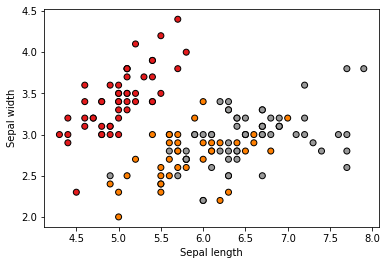

In [10]:
# Plot the training points
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")